In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.random.seed(601)

## 1. 데이터 불러오기

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
train = pd.DataFrame(boston.data , columns = boston.feature_names)

train['PRICE'] = boston.target

# 결정자 할당
target = train['PRICE']

train.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


**[컬럼 설명]**

## 2. 전처리 & EDA

In [3]:
print('[shape]\t',train.shape)
print('\n[info]\n')
train.info()

[shape]	 (506, 14)

[info]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


* 컬럼 타입
* null check
* object 타입 - category 컬럼 확인 => 숫자형 변환

In [4]:
print('\n전체 feature 들의 type \n',train.dtypes.value_counts())


전체 feature 들의 type 
 float64    14
dtype: int64


In [5]:
train.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* 컬럼별 분포 파악 - 왜곡, 이상치

**데이터 분포 확인**

col: 14.33370    2
0.01501     2
0.08265     1
0.53700     1
1.35472     1
           ..
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64


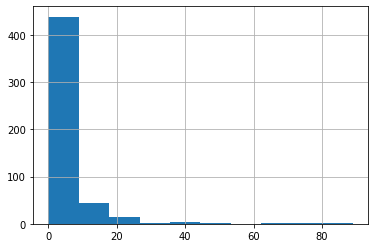

col: 0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64


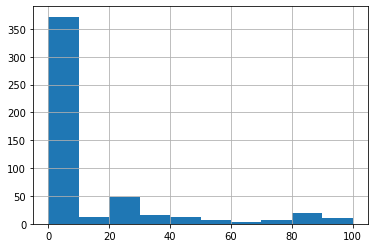

col: 18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64


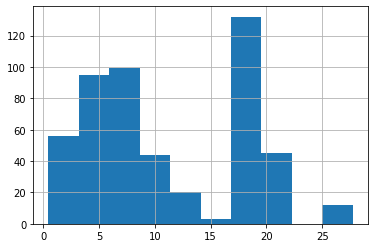

col: 0.0    471
1.0     35
Name: CHAS, dtype: int64


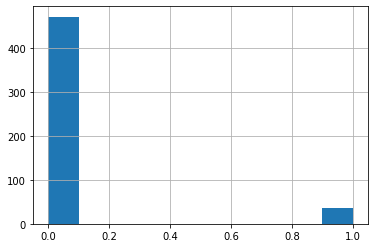

col: 0.538    23
0.713    18
0.437    17
0.871    16
0.489    15
         ..
0.385     1
0.394     1
0.518     1
0.422     1
0.389     1
Name: NOX, Length: 81, dtype: int64


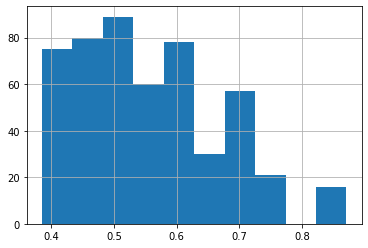

col: 6.167    3
6.229    3
6.127    3
5.713    3
6.417    3
        ..
6.552    1
4.368    1
6.174    1
6.701    1
6.625    1
Name: RM, Length: 446, dtype: int64


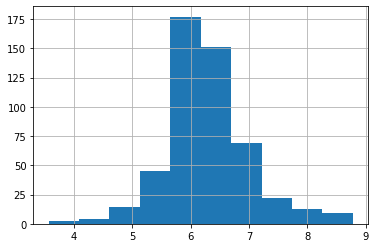

col: 100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
         ..
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64


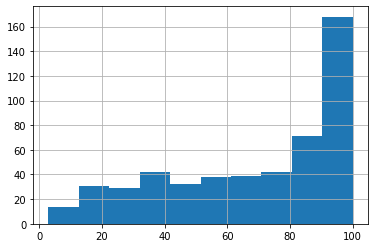

col: 3.4952    5
5.2873    4
5.4007    4
5.7209    4
6.8147    4
         ..
3.5549    1
4.4534    1
2.1000    1
4.0905    1
1.8125    1
Name: DIS, Length: 412, dtype: int64


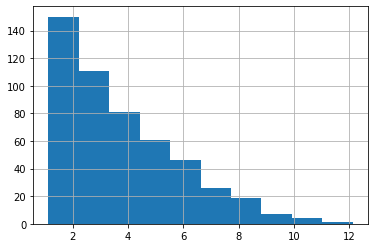

col: 24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


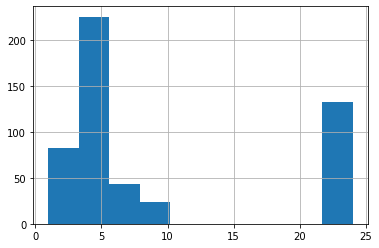

col: 666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
187.0      1
255.0      1
313.0      1
469.0      1
280.0      1
Name: TAX, Length: 66, dtype: int64


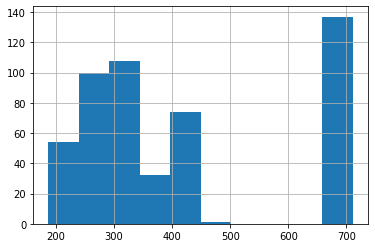

col: 20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
18.6     17
19.1     17
16.6     16
18.4     16
21.2     15
15.2     13
13.0     12
20.9     11
17.9     11
18.7      9
19.7      8
19.6      8
17.6      7
16.4      6
18.0      5
16.0      5
20.1      5
16.1      5
16.9      5
16.8      4
14.9      4
19.0      4
18.5      4
17.0      4
18.2      4
18.3      4
12.6      3
14.8      3
18.9      3
15.3      3
15.9      2
22.0      2
15.6      2
18.8      2
15.5      1
17.3      1
15.1      1
21.1      1
13.6      1
14.4      1
Name: PTRATIO, dtype: int64


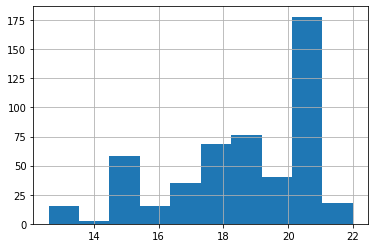

col: 396.90    121
395.24      3
393.74      3
393.23      2
394.72      2
         ... 
394.46      1
288.99      1
390.30      1
248.31      1
390.50      1
Name: B, Length: 357, dtype: int64


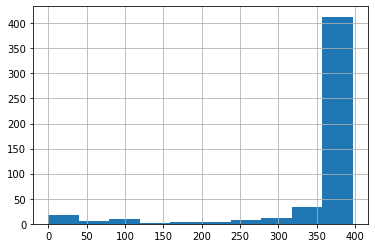

col: 14.10    3
6.36     3
18.13    3
8.05     3
7.79     3
        ..
9.69     1
9.62     1
5.64     1
22.98    1
29.05    1
Name: LSTAT, Length: 455, dtype: int64


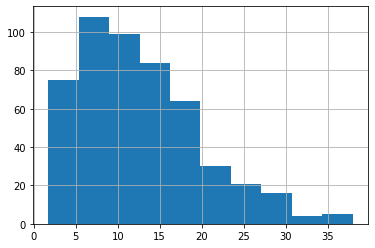

col: 50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: PRICE, Length: 229, dtype: int64


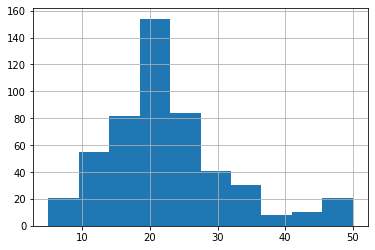

In [6]:
def df_value_counts(df):
    for col in df.columns:
        print('col:', df[col].value_counts())
        df[col].hist()
        plt.show()
    
df_value_counts(train)

### 결측치

In [7]:
# NULL 확인 
train.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### EDA

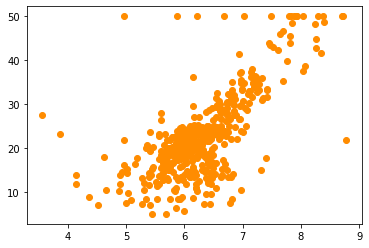

In [8]:
plt.scatter(train.RM , train.PRICE,c="darkorange")
plt.show()

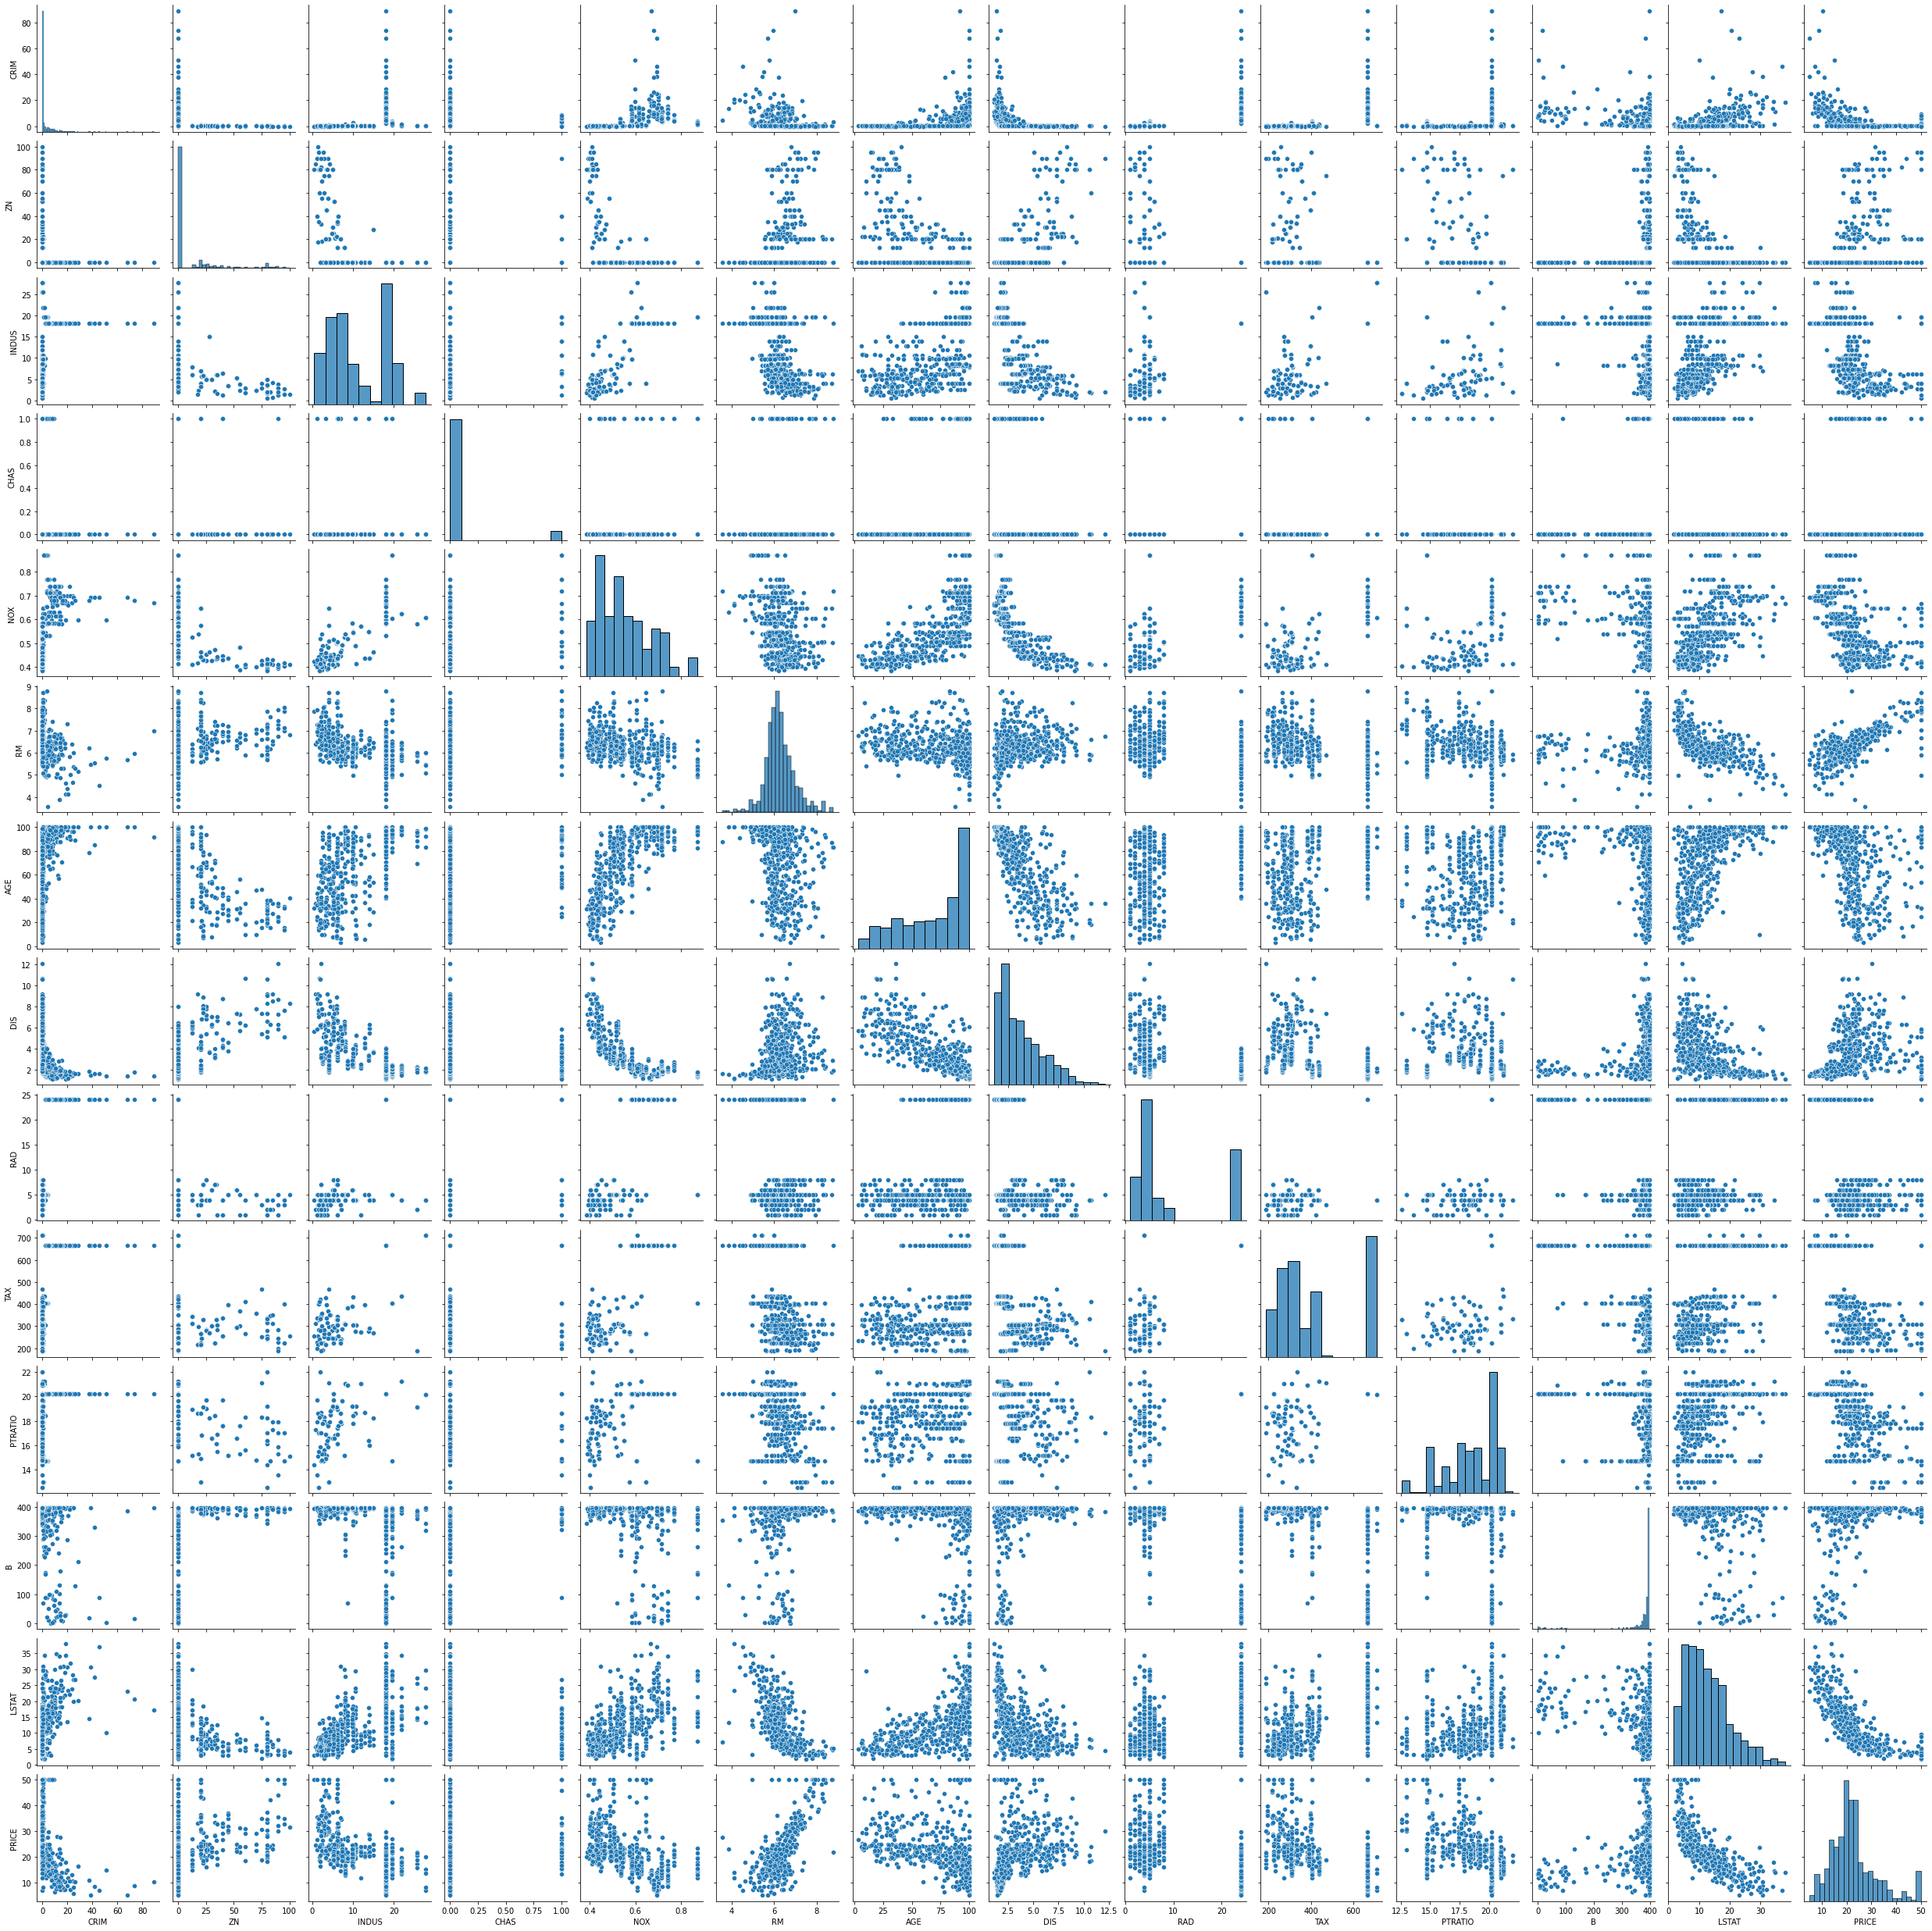

In [9]:
sns.pairplot(train)
plt.show()

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

<AxesSubplot:xlabel='ZN', ylabel='PRICE'>

<AxesSubplot:xlabel='INDUS', ylabel='PRICE'>

<AxesSubplot:xlabel='NOX', ylabel='PRICE'>

<AxesSubplot:xlabel='AGE', ylabel='PRICE'>

<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

<AxesSubplot:xlabel='RAD', ylabel='PRICE'>

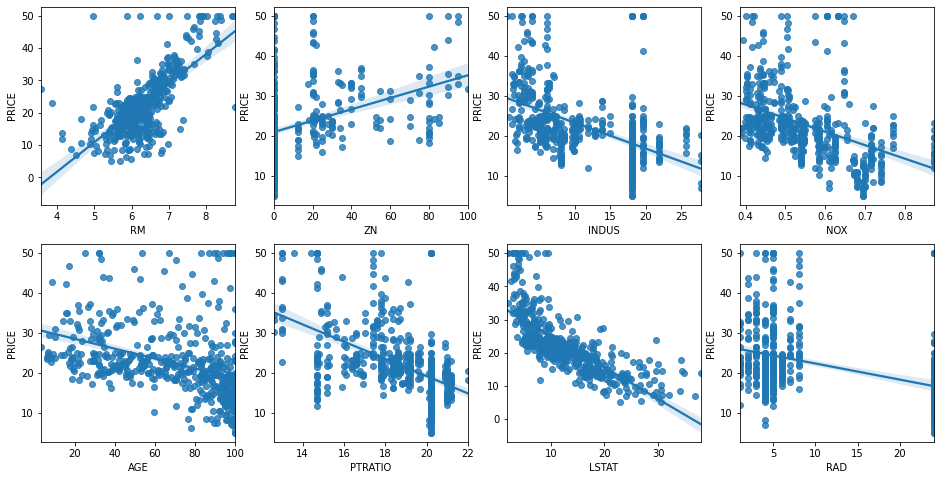

In [10]:
# 숫자만

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=train , ax=axs[row][col])

선형성이 큰 컬럼 파악

### 이상치

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    
    fraud = df[column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

outlier_index = get_outlier(df=train, column='PTRATIO', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)
train.drop(outlier_index, axis=0, inplace=True)
target.drop(outlier_index, axis=0, inplace=True)

print(train.shape, target.shape)

# 전처리
* 1. 스케일링과 정규화(StandardScaler, MinMaxScaler)
* 2. 1번으로 향상 없을 시, 다항 적용(PolynomialFeatures)
* 3. 1,2 보다 많이 사용되는 **로그 변환**

### 왜곡

* train 왜곡

In [ ]:
from scipy.stats import skew

#object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = train.dtypes[train.dtypes != 'object'].index

#house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = train[features_index].apply(lambda x : skew(x))

#skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

#왜곡도가 1인 피처들은 로그 변환 적용하고 다시 하이퍼 파라미터 튜닝 후 재 학습/예측/평가
#train[skew_features_top.index] = np.log1p(train[skew_features_top.index])

train.head()

### 선형 회귀 모델을 위한 데이터 변환

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [12]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=train)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    
    #get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
    #                    y_target_n=train, verbose=False)


## 변환 유형:None, Polynomial Degree:None

## 변환 유형:Standard, Polynomial Degree:None

## 변환 유형:Standard, Polynomial Degree:2

## 변환 유형:MinMax, Polynomial Degree:None

## 변환 유형:MinMax, Polynomial Degree:2

## 변환 유형:Log, Polynomial Degree:None


### 인코딩
* 원-핫 인코딩(One-Hot encoding)

In [13]:
train = pd.get_dummies(train)
train.head(3)
print(train.shape, target.shape)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


(506, 14) (506,)


<Figure size 648x648 with 0 Axes>

<AxesSubplot:>

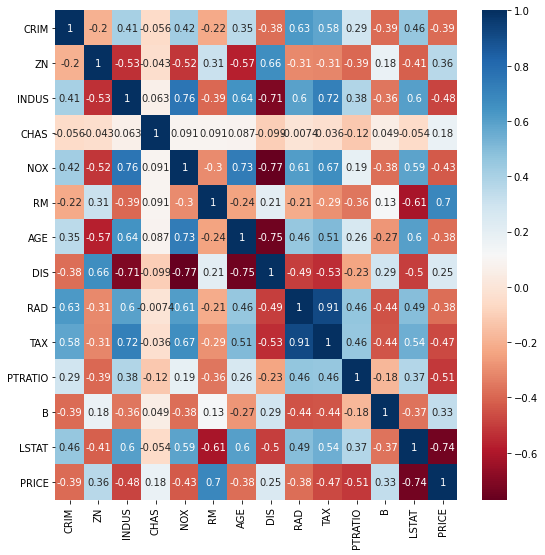

In [14]:
plt.figure(figsize=(9, 9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)

* ! 모두 숫자형으로 변환이 완료 되었는가?

## 3. 모델링 

### 학습 데이터와 테스트 데이터 세트로 분리

In [15]:
# 데이터에서 결정자 삭제 
train.drop('PRICE', axis=1, inplace=True)

In [16]:
print(train.shape, target.shape)

(506, 13) (506,)


In [17]:
# LogisticRegression 는 스케일링 적용하고 train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
train = scaler.fit_transform(train)
train = pd.DataFrame(train , columns = boston.feature_names)

In [18]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train , target ,test_size=0.3, shuffle=True, random_state=156)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


### SMOTE 오버 샘플링

In [20]:
"""
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())
"""

"\nfrom imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(random_state=0)\nX_train_over, y_train_over = smote.fit_sample(X_train, y_train)\nprint('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)\nprint('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)\nprint('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())\n"

### 모델 학습
* LinearRegression: RSS(Residual Sum of Squares) 최소화해 OLS(Ordinary Least Squares) 추정방식
* LogisticRegression: 정규 분포에 영향 받으므로 스케일링 적용 후 적용
    * 선형 회귀 기반 + 시그모이드 함수
    * 분류, 희소

In [21]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [22]:
li_reg = LinearRegression(
    fit_intercept=True, # 절편값 계산, False: 절편 사용되지 않고 0 
    normalize=False, # fit_intercept=True 일때만 사용, 회귀 수행 전 정규화 수행
    copy_X=True,
    n_jobs=None,
)

lo_reg = LogisticRegression()

rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)

gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

### fit

In [23]:
li_reg.fit(X_train ,y_train)
#lo_reg.fit(X_train ,y_train.astype('int'))
#rf_reg.fit(X_train ,y_train)

LinearRegression()

### predict

In [24]:
y_preds = li_reg.predict(X_test)
#y_preds = lo_reg.predict(X_test)
#y_preds = rf_reg.predict(X_test)

In [25]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [26]:
# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_train, y_train)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 4.513 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 3.441 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 3.271 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 3.790 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 3.584 


LinearRegression max_depth 변경할 때 시각화 

LinearRegression()

DecisionTreeRegressor(max_depth=2)

DecisionTreeRegressor(max_depth=7)

Text(0.5, 1.0, 'Linear Regression')

Text(0.5, 1.0, 'Decision Tree Regression: \n max_depth=2')

Text(0.5, 1.0, 'Decision Tree Regression: \n max_depth=7')

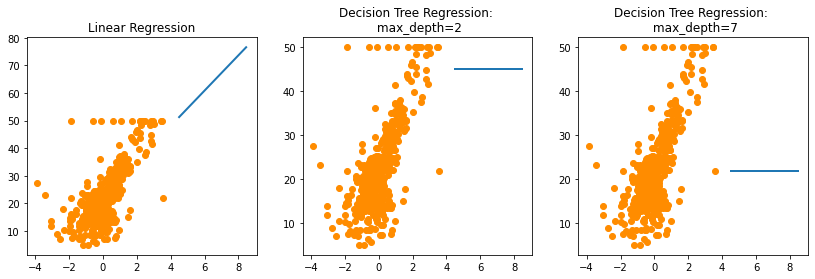

In [27]:
# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test_reshape = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = train['RM'].values.reshape(-1,1)
y_target = target.values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test_reshape)
pred_rf2 = rf_reg2.predict(X_test_reshape)
pred_rf7 = rf_reg7.predict(X_test_reshape)

fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(train.RM, target, c="darkorange")
ax1.plot(X_test_reshape, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(train.RM, target, c="darkorange")
ax2.plot(X_test_reshape, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(train.RM, target, c="darkorange")
ax3.plot(X_test_reshape, pred_rf7, label="max_depth:7", linewidth=2)

# 평가
* 회귀: Mean(오차(실제값 - 예측값)) : 오차 평균에 기반 
* 분류: 일반적으로 오차에 기반 + **성능 평가 지표**
    * **이진분류:** 정확도 << 성능 평가 지표
    
### 평가 지표
* MAE(Mean Absolute Error): 차이 절댓값 평균
* MSE(Mean Sqared Error): 차이 제곱 평균
    * MSLE(MS Log Error): 로그 MSE
* RMSE(Root MSE): 루트 MSE
    * RMSLE(RMS Log Error) 로그 RMSE
* R^2: 분산 기반, 실제값고 분산 대비 예측 값의 분산비율, 1에 가까울수록 정확

### 평가 방법

In [28]:
col_name = ["평가방법","사이킷런 평가 지표 API","Scoring 함수 적용 값"]
arr_method = [ ["MAE", "metric.mean_absolute_error","neg_mean_absolute_error"]
              ,["MSE", "metric.mean_squared_error","neg_mean_squared_error"]
              ,["R^2", "metric.r2_score","r2"]]
pd.DataFrame(arr_method, columns=col_name)

,평가방법,사이킷런 평가 지표 API,Scoring 함수 적용 값
0,MAE,metric.mean_absolute_error,neg_mean_absolute_error
1,MSE,metric.mean_squared_error,neg_mean_squared_error
2,R^2,metric.r2_score,r2


**neg_: -1 * metrics**

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [30]:
# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def mse(y,pred):
    return mean_squared_error(y,pred)

# 책에서는 mean_absolute_error()를 MSE로 잘못 기재함. 
# MAE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mse_val = mse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}, MSE: {3:.3F}'.format(rmsle_val, rmse_val, mae_val, mse_val))

In [31]:
evaluate_regr(y_test, y_preds)

RMSLE: 0.204, RMSE: 4.159, MAE: 3.214, MSE: 17.297


오류값이 큰 순으로 5개 확인 

In [32]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,y_preds,n_tops=5)

     real_count  predicted_count  diff
47         46.7             35.0  11.7
13         48.3             37.0  11.3
78         11.9             23.0  11.1
43          7.0             -4.0  11.0
150         7.2             18.0  10.8


**선형회귀**

In [33]:
# Regressor 클래스에는 없음 

print('절편 값:',li_reg.intercept_)
print('회귀 계수값:', np.round(li_reg.coef_, 1))

절편 값: 22.95123067721854
회귀 계수값: [-1.   1.5  0.2  0.8 -2.3  2.4  0.2 -3.7  3.1 -2.4 -2.   0.9 -4. ]


In [34]:
# coef_ 는 회귀 계수 값만 가지므로 피처와 매핑해서 내림차순 정렬

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(li_reg.coef_, 1), index=X_train.columns )
coeff.sort_values(ascending=False)

RAD        3.1
RM         2.4
ZN         1.5
B          0.9
CHAS       0.8
AGE        0.2
INDUS      0.2
CRIM      -1.0
PTRATIO   -2.0
NOX       -2.3
TAX       -2.4
DIS       -3.7
LSTAT     -4.0
dtype: float64

**회귀 트리는 선형 회귀의 회귀 계수 대신, 피처 중요도로 피처의 상대적 중요도를 알 수 있음**

RandomForestRegressor(n_estimators=1000)

<AxesSubplot:>

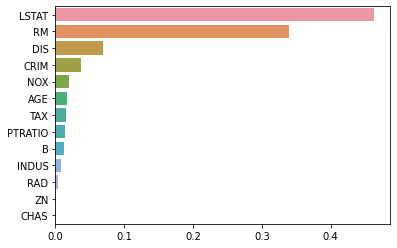

In [35]:

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_train, y_train)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_train.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

### GridSearchCV = 교차 검증 + 하이퍼파라미터 튜닝

In [36]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lo_reg, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(train, target.astype(int))
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 1, 5, 10],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.097


### 교차검증
**cross_val_score = KFold/StratifiedKFold + train_test_split + fit/predict/evaluation**

In [37]:
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(li_reg, train, target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 규제

In [38]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Ridge Regression

In [39]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-37.1   -20.008 -38.554 -25.668 -16.046]
 5 folds 의 개별 RMSE scores :  [6.091 4.473 6.209 5.066 4.006]
 5 folds 의 평균 RMSE : 5.169 


In [40]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.162 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.162 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.161 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.169 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.454 


Ridge(alpha=0)

Text(0.5, 1.0, 'alpha:0')

(-3.0, 6.0)

<AxesSubplot:title={'center':'alpha:0'}>

Ridge(alpha=0.1)

Text(0.5, 1.0, 'alpha:0.1')

(-3.0, 6.0)

<AxesSubplot:title={'center':'alpha:0.1'}>

Ridge(alpha=1)

Text(0.5, 1.0, 'alpha:1')

(-3.0, 6.0)

<AxesSubplot:title={'center':'alpha:1'}>

Ridge(alpha=10)

Text(0.5, 1.0, 'alpha:10')

(-3.0, 6.0)

<AxesSubplot:title={'center':'alpha:10'}>

Ridge(alpha=100)

Text(0.5, 1.0, 'alpha:100')

(-3.0, 6.0)

<AxesSubplot:title={'center':'alpha:100'}>

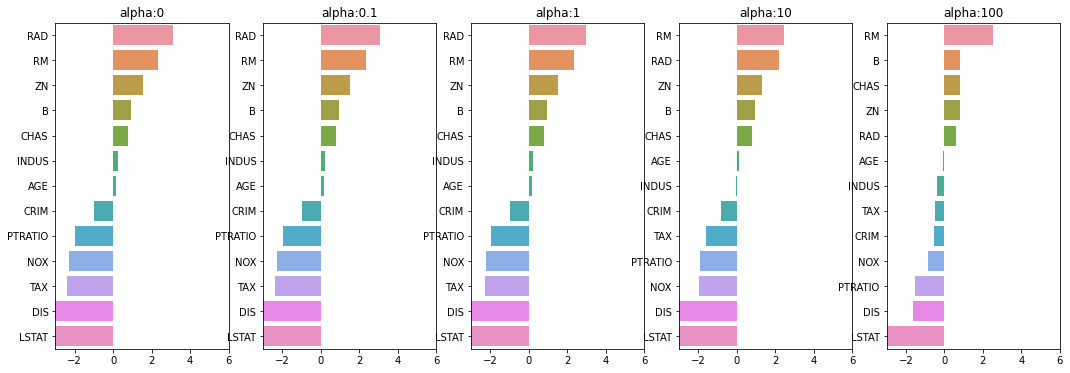

In [41]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



In [42]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RAD,3.095714,3.083185,2.975205,2.219993,0.623368
RM,2.354928,2.356326,2.368510,2.460146,2.531568
ZN,1.526399,1.523784,1.500965,1.324766,0.809079
B,0.948219,0.948308,0.949030,0.950221,0.832264
CHAS,0.772875,0.773417,0.778057,0.808553,0.813204
INDUS,0.236014,0.231842,0.196152,-0.037570,-0.382787
AGE,0.166958,0.166209,0.159622,0.105892,-0.090423
CRIM,-0.970838,-0.968807,-0.951168,-0.820596,-0.529048
PTRATIO,-1.990170,-1.989037,-1.979047,-1.895282,-1.519255
NOX,-2.291627,-2.287282,-2.249017,-1.932854,-0.868370


### 라쏘

In [43]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_train , y_train)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=train.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [44]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_train, y_target_n=y_train)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.180 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.210 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.593 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.825 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.759 


In [45]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,2.464616,2.506690,2.735986,2.594976,1.733831
RAD,1.946961,1.498267,0.000000,-0.000000,-0.000000
ZN,1.259907,1.163137,0.142449,0.000000,0.000000
B,0.920570,0.908546,0.651990,0.201392,0.000000
CHAS,0.758839,0.746297,0.458490,0.036545,0.000000
INDUS,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
AGE,0.000000,0.000000,-0.000000,-0.000000,-0.000000
CRIM,-0.680042,-0.552590,-0.000000,-0.000000,-0.000000
TAX,-1.384367,-1.021211,-0.000000,-0.000000,-0.000000
PTRATIO,-1.870203,-1.827583,-1.474899,-1.218452,-0.000000


### 엘라스틱넷 회귀

In [46]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_train, y_target_n=y_train)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.182 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.208 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.546 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.892 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 7.021 


In [47]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,2.505494,2.545547,2.651175,2.450855,1.570607
RAD,1.797674,1.415157,0.000000,-0.000000,-0.000000
ZN,1.214514,1.118693,0.432773,0.168177,0.000000
B,0.930677,0.917675,0.719378,0.505053,0.000000
CHAS,0.780102,0.774713,0.588843,0.327383,0.000000
INDUS,-0.000000,-0.041264,-0.009439,-0.000000,-0.094257
AGE,0.000000,0.000000,-0.000000,-0.000000,-0.000000
CRIM,-0.674743,-0.578022,-0.095717,-0.009954,-0.000000
TAX,-1.264158,-0.955742,-0.019460,-0.077310,-0.062591
NOX,-1.778129,-1.619128,-0.505760,-0.139468,-0.000000


### 다항 회귀

In [48]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

In [49]:
## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])

MSE : 32726.718 , RMSE : 180.905
Variance score : -458.341


In [50]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

### 스태킹

In [51]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [52]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Ridge(alpha=10)

Lasso(alpha=0.001)

In [53]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [54]:
# OLS Ordinary Least Squares(최소자승법): 잔차제곱합(RSS) 최소화하는 가중치 벡터  
import statsmodels.api as sm

sm.OLS(target, train).fit().summary()
# y = -0.9281CRIM + 1.0816ZN+...
# 상수항 추가 sm.add_constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.082
Method:                 Least Squares   F-statistic:                              4.477
Date:                Fri, 04 Jun 2021   Prob (F-statistic):                    3.14e-07
Time:                        11:05:06   Log-Likelihood:                         -2304.8
No. Observations:                 506   AIC:                                      4636.
Df Residuals:                     493   BIC:                                      4691.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.9281      1.388     -0.669      0.504      -3.654       1.798
ZN             1.0816      1.571      0.688      0.492      -2.006       4.169
INDUS          0.1409      2.071      0.068      0.946      -3.928       4.210
CHAS           0.6817      1.074      0.635      0.526      -1.429       2.792
NOX           -2.0567      2.173     -0.947      0.344      -6.325       2.212
RM             2.6742      1.441      1.855      0.064      -0.158       5.506
AGE            0.0195      1.825      0.011      0.991      -3.567       3.605
DIS           -3.1040      2.062     -1.506      0.133      -7.154       0.946
RAD            2.6622      2.836      0.939      0.348      -2.909       8.234
TAX           -2.0768      3.111     -0.668      0.505      -8.189       4.035
PTRATIO       -2.0606      1.390     -1.482      0.139      -4.792       0.671
B              0.8493      1.204      0.706      0.481      -1.516       3.214
LSTAT         -3.7436      1.778     -2.106      0.036      -7.236      -0.251
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
df = X_train.copy()
df['y'] = y_train

result = sm.OLS.from_formula('y ~ CRIM', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     60.12
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           9.70e-14
Time:                        14:27:20   Log-Likelihood:                -1270.1
No. Observations:                 354   AIC:                             2544.
Df Residuals:                     352   BIC:                             2552.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8619      0.466     49.026      0.000      21.945      23.779
CRIM          -4.0619      0.524     -7.754      0.000      -5.092      -3.032
==============================================================================
Omnibus:                      100.617   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.700
Skew:                           1.517   Prob(JB):                     1.59e-44
Kurtosis:                       5.113   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
result.predict({"CRIM": [-1,0,1]})

0    26.923820
1    22.861911
2    18.800001
dtype: float64

In [86]:
result.params, result.resid # params: 가중치 벡터, resid: 잔차 벡터

(Intercept    22.861911
 CRIM         -4.061910
 dtype: float64,
 49     -5.066130
 19     -6.026930
 261    18.782463
 503    -0.641293
 72     -1.726696
          ...    
 63      0.489782
 485    -1.633479
 418    18.989375
 204    25.439482
 44     -3.312019
 Length: 354, dtype: float64)